In [20]:
# IMPORTING LIBRARIES

# General Libraries

# import os
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy.stats import norm
# from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

# from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
# from mlxtend.classifier import StackingCVClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_predict, RandomizedSearchCV, GridSearchCV, KFold, cross_validate, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import recall_score, f1_score, roc_auc_score, accuracy_score, precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import display
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif 
from sklearn.decomposition import PCA

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer


##### Explore the data

In [21]:
# IMPORTING DATA

bank_data = pd.read_csv('../data/original/data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [22]:
# all data is nummeric and no missing values
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [23]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [24]:
# Checking for duplicates
bank_data.duplicated().sum()

0

In [25]:
# The classes are heavily skewed we need to solve this issue later.
print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Not bankrupt: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100, 2), '% of the dataset')
print('Bankrupt: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100, 2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Not bankrupt:  96.77 % of the dataset
Bankrupt:  3.23 % of the dataset


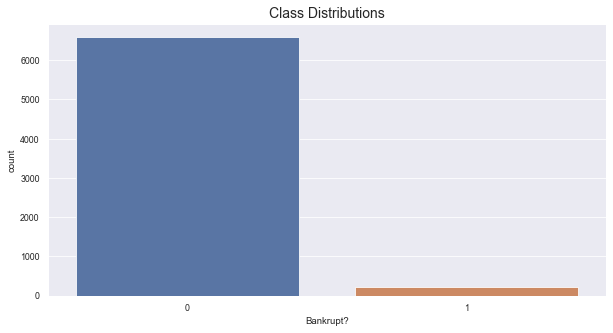

In [26]:
# Checking labels distributions
sns.set_theme(context = 'paper')
plt.figure(figsize = (10,5))
sns.countplot(bank_data['Bankrupt?'])
plt.title('Class Distributions', fontsize=14)
plt.show()

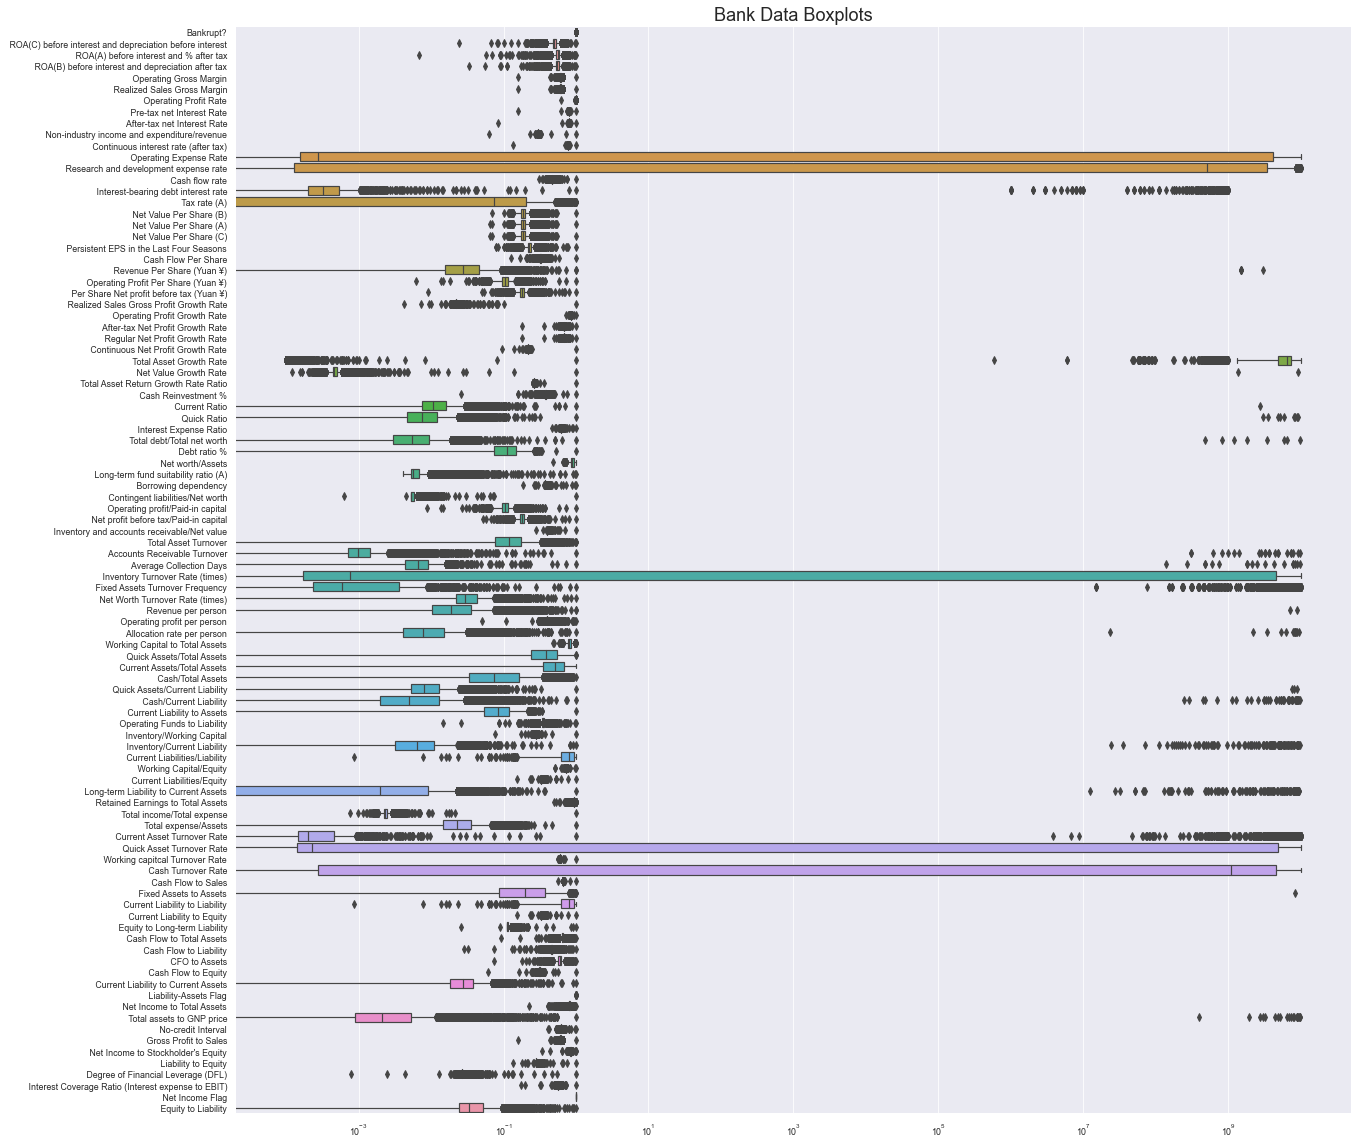

In [27]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [28]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# For plotting confusion matrix. Taken from the exercises
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
train = pd.read_csv('../data/original/training_dataset.csv')
test = pd.read_csv('../data/original/evaluation_dataset.csv')

print(train['Bankrupt?'].value_counts())
print(test['Bankrupt?'].value_counts()) 

0    5279
1     176
Name: Bankrupt?, dtype: int64
0    1320
1      44
Name: Bankrupt?, dtype: int64


In [ ]:
y_train = train['Bankrupt?']
X_train = train.drop(['Bankrupt?'], axis = 1)

y_test = test['Bankrupt?']
X_test = test.drop(['Bankrupt?'], axis = 1)

print(y_train.value_counts())
print(y_test.value_counts()) 

0    5279
1     176
Name: Bankrupt?, dtype: int64
0    1320
1      44
Name: Bankrupt?, dtype: int64


##### Anomaly detection
Does not get particulary good results

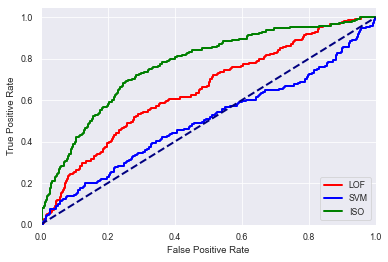

In [ ]:
# Apply the anomaly detection techniques and draw a ROC-curve of their performance.
y_actual = LabelBinarizer().fit_transform(y_train)
estimates = []

# LOF
lof_score = LocalOutlierFactor().fit(X_train).negative_outlier_factor_ * -1
estimates.append({'name': 'LOF', 'score': lof_score, 'color': 'Red'})

# SVM
svm_score = OneClassSVM(gamma='scale').fit(X_train).score_samples(X_train) * -1
estimates.append({'name': 'SVM', 'score': svm_score, 'color': 'Blue'})

# IsoForest
iso_score = IsolationForest().fit(X_train).score_samples(X_train) * -1
estimates.append({'name': 'ISO', 'score': iso_score, 'color': 'Green'})

plt.figure()
for e in estimates:
    fpr, tpr, _ = roc_curve(y_actual, e['score'])
    plt.plot(fpr, tpr, color=e['color'], lw=2, label=e['name'])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.03)
# fit on majority class
X_train = X_train[y_train==0]
model.fit(X_train)
# detect outliers in the test set
yhat = model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.024


              precision    recall  f1-score   support

          -1       0.02      0.02      0.02        44
           1       0.97      0.97      0.97      1320

    accuracy                           0.94      1364
   macro avg       0.50      0.50      0.50      1364
weighted avg       0.94      0.94      0.94      1364

f1-score: 0.9686


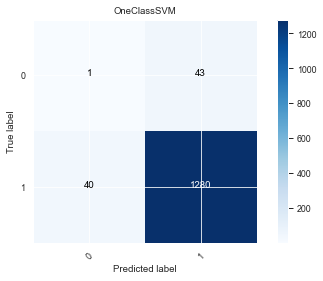

In [ ]:
print(classification_report(y_test, yhat))
test_conf_matrix = confusion_matrix(y_test, yhat)
print(f'f1-score: {round(f1_score(y_test, yhat), 4)}')
plot_confusion_matrix(test_conf_matrix, classes=[0, 1], title='OneClassSVM')

In [ ]:
# define outlier detection model
model = IsolationForest(contamination='auto')
# fit on majority class
X_train = X_train[y_train==0]
model.fit(X_train)
# detect outliers in the test set
yhat = model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.044


              precision    recall  f1-score   support

          -1       1.00      0.02      0.04      1364
           1       0.00      0.00      0.00         0

    accuracy                           0.02      1364
   macro avg       0.50      0.01      0.02      1364
weighted avg       1.00      0.02      0.04      1364

f1-score: 0.0


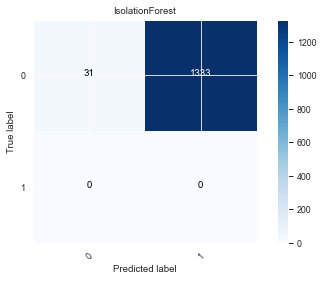

In [ ]:
print(classification_report(y_test, yhat))
test_conf_matrix = confusion_matrix(y_test, yhat)
print(f'f1-score: {round(f1_score(y_test, yhat), 4)}')
plot_confusion_matrix(test_conf_matrix, classes=[0, 1], title='IsolationForest')